In [1]:
#initialize
import matplotlib.pyplot as plt
import dataset_parser.parser as pr
import logging
import importlib
import random
import tensorflow.keras as keras

from pydub import AudioSegment

from os import path

file_path = 'multimedia.txt'
logging.basicConfig(level=logging.INFO)
    
parser = pr.datasetParser()
logging.info(parser)


INFO:root:<dataset_parser.parser.datasetParser object at 0x7f765c5e1ef0>


# Dataset

## Základné operácie

Použitiu neurónových sietí na klasifikačné úlohy predchádza proces ich trénovania. Počas tohto procesu neurónová sieť, extrahovaním hlbšieho významu z poskytnutých dát, získavá požadovanú schopnosť zaradiť objekt do vybraných tried. Trénovanie neurónovej siete priamo závisí na samotnom návrhu a implementácii neurónovej siete, ako aj na kvalite a kvantite dát poskytnutých na jej učenie.

### Načítaj dataset z dataset_parser/dataset_info.save 
(alebo ho vytvor z multimedia.txt, ak neexistuje - trvá trošku dlhšie z webu sa sťahujú dodatočné informácie o zvieratách)

In [2]:
importlib.reload(pr)

multimedia_path = 'dataset_parser/multimedia.txt'
dataset_save_path = 'dataset_parser/dataset_info.save'

#parse dataset if not parsed yet
if not path.exists(multimedia_path):
    # parsed dataset
    data = parser.parse_dataset(file_path)

    # aggregated dataset
    aggregated_data = parser.get_aggregated(parsed_dataset=data, download_extended_information=True)
    parser.serialize_dataset_to_file(aggregated_data)

# load dataset from file
dataset_info = parser.load_dataset_from_file(dataset_save_path)
logging.info('Dataset loaded ;)')

INFO:root:Dataset loaded ;)


### Stiahni jednotlivé zvukové stopy
(sťahujú sa iba chýbajúce súbory) 

In [3]:
importlib.reload(pr)

# download records
records_path = 'dataset_parser/records'
parser.download_records(dataset_info, records_path, dataset_save_path)

INFO:root:Downloading ...


INFO:root:Spieces(0/1934): dataset_parser/records/Crex_crex


INFO:root:Spieces(1/1934): dataset_parser/records/Phylloscopus_ibericus


INFO:root:Spieces(2/1934): dataset_parser/records/Muelleripicus_pulverulentus


INFO:root:Spieces(3/1934): dataset_parser/records/Anas_acuta


INFO:root:Spieces(4/1934): dataset_parser/records/Acrocephalus_palustris


ERROR:root:Undefined error: ://


ERROR:root:Undefined error: ://


INFO:root:Spieces(5/1934): dataset_parser/records/Panthera_leo


INFO:root:Spieces(6/1934): dataset_parser/records/Emberiza_hortulana


INFO:root:Spieces(7/1934): dataset_parser/records/Emberiza_citrinella


INFO:root:Spieces(8/1934): dataset_parser/records/Cuculus_canorus


ERROR:root:Undefined error: ://


ERROR:root:Undefined error: ://


ERROR:root:Undefined error: ://


INFO:root:Spieces(9/1934): dataset_parser/records/Chloris_chloris


INFO:root:Spieces(10/1934): dataset_parser/records/Turdus_philomelos


INFO:root:Spieces(11/1934): dataset_parser/records/Turdus_merula


ERROR:root:Undefined error: http://www.tierstimmenarchiv.de/recordings/Turdus_merula_Bru_DAT0021_03_short.mp3


## Analýza dát

Agregácia informácií o datasete, vzorkách
* počet druhov
* rozloženie počtu zvierat v druhoch
* počet nahrávok

In [5]:

dataset = parser.load_dataset_from_file(dataset_save_path)

logging.info("Počet zvierat: " + str(len(dataset)))

spieces = dict()
spieces['other'] = 0
records_count = 0

# iterate all animals
for animal in dataset:
    if dataset[animal]['spieces'] is not '':
        if dataset[animal]['spieces'] in spieces:
            spieces[dataset[animal]['spieces']] += 1
        else:
            spieces[dataset[animal]['spieces']] = 1
    else:
        spieces['other'] += 1
        
    records_count += len(dataset[animal]['record_url'])
        
logging.info("Počet druhov: " + str(len(spieces)))
logging.info("Počet nahrávok: " + str(records_count) + "\n")

# Print spieces and count of animals
logging.info("----- Druhy/počet zvierat získaných online podľa latinského názvu: -----")
for key, value in spieces.items():
    logging.info(str(key) + ': ' + str(value))

INFO:root:Počet zvierat: 1934


INFO:root:Počet druhov: 12


INFO:root:Počet nahrávok: 16409



INFO:root:----- Druhy/počet zvierat získaných online podľa latinského názvu: -----


INFO:root:other: 1479


INFO:root:Vták: 352


INFO:root:Hmyz: 13


INFO:root:Živočích: 64


INFO:root:4,5 hviezd. (75) 
Cestovná kancelária v Bratislave: 1


INFO:root:Obojživelníky: 4


INFO:root:Hlodavce: 6


INFO:root:Primáty: 9


INFO:root:Zviera: 3


INFO:root:Hady: 1


INFO:root:5,0 hviezd. (1) 
Obchod s potravinami: 1


INFO:root:Plaz: 1


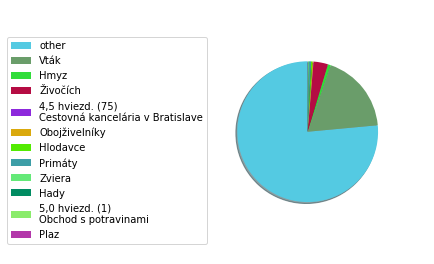

In [33]:
# Show diagram for spieces
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(records_count)]
sizes = spieces.values()
labels = spieces.keys()

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best", bbox_to_anchor=(0.1,0.9))


plt.axis('equal')
plt.tight_layout()

plt.show()

Môžeme vidieť, že prevažuju záznamy, pri ktorých nevieme zaradiť zviera do konkrétneho druhu.

## Predspracovanie zvukových stôp

Procesy spracovania zvukových stôp:
1. Odstránenie "hluhých" miest zo zvukovej stopy
2. Rozloženie zvukovej stopy na kratšie zvukové stopy rovnakej dĺžky
3. Vytvorenie spektogramu pre zvukovú stopu

Time bins:  259
Frequency bins:  513
Sample rate:  44100
Samples:  132300
Graphic interface...


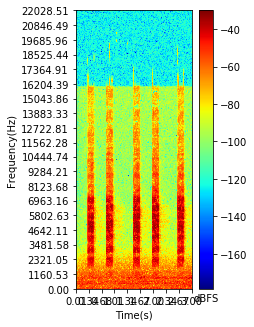

Time bins:  259
Frequency bins:  513
Sample rate:  44100
Samples:  132300
Graphic interface...


<Figure size 432x288 with 0 Axes>

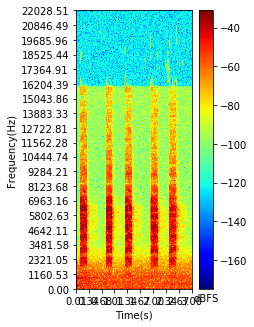

Time bins:  259
Frequency bins:  513
Sample rate:  44100
Samples:  132300
Graphic interface...


<Figure size 432x288 with 0 Axes>

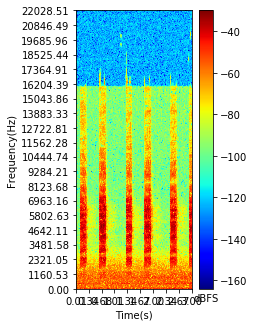

Time bins:  259
Frequency bins:  513
Sample rate:  44100
Samples:  132300
Graphic interface...


<Figure size 432x288 with 0 Axes>

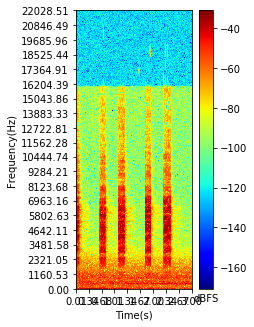

Time bins:  259
Frequency bins:  513
Sample rate:  44100
Samples:  132300
Graphic interface...


<Figure size 432x288 with 0 Axes>

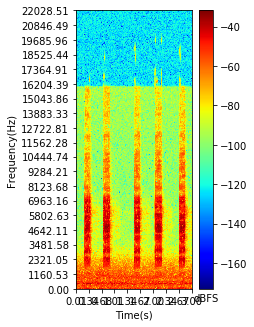

Time bins:  259
Frequency bins:  513
Sample rate:  44100
Samples:  132300
Graphic interface...


<Figure size 432x288 with 0 Axes>

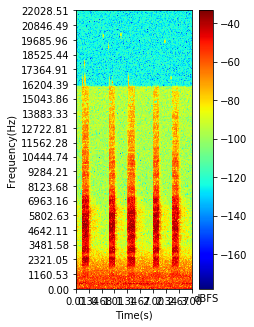

<Figure size 432x288 with 0 Axes>

In [6]:
import src.models.preprocessor as preprocessor
import src.models.spectrogram as spectogram

sound_track_path = 'dataset_parser/records/Crex_crex/crex_crex0.mp3'
trimmed_path = 'dataset_parser/records/Crex_crex/crex_crex0_trimmed.wav'

# 0. convert from mp3 to wav
sound_track_path = preprocessor.from_mp3_to_wav(sound_track_path)

# 1. remove silence
sound = AudioSegment.from_file(sound_track_path, format="wav")

start_trim = preprocessor.detect_leading_silence(sound)
end_trim = preprocessor.detect_leading_silence(sound.reverse())

duration = len(sound)
trimmed_sound = sound[start_trim:duration - end_trim]
trimmed_sound.export(trimmed_path, format="wav")

# 2. split sound track
samples = preprocessor.split_records(trimmed_path)

# 3. create spectograms
for sample in samples:
    spectogram.create_spectogram(sample, 'l')
